# Cálculo autoconsistente Ground State H$^{-}$

Darío Mitnik

In [1]:
from numpy import  linspace, zeros, array, pi, sqrt
from scipy.linalg import  eigh , eigvalsh

%matplotlib inline
from matplotlib.pyplot import plot, title, legend, show, axhline, \
                              xlabel, ylabel, axis, figure

In [2]:
nsize = 12
S = zeros((nsize,nsize))  # Overlap
H = zeros((nsize,nsize))  # One-electron Hamiltonian
G = zeros((nsize,nsize))  # Two-electron Operator
F = zeros((nsize,nsize))  # Fock Operator Hij + Gij

# Gaussian Basis  Ci*exp(-Alpha*r^2)
Alpha = zeros((nsize))    
Ci = zeros((nsize))

EnergyGS = []

In [3]:
# Datos Iniciales
Alpha[0] = 50.0
Alpha[1] = 40.0
Alpha[2] = 30.
Alpha[3] = 20.0
Alpha[4] = 10.0
Alpha[5] = 5.0
Alpha[6] = 2.5
Alpha[7] = 1.0
Alpha[8] = 0.5
Alpha[9] = 0.1
Alpha[10] = 0.05
Alpha[11] = 0.01

In [4]:
# Cálculo de Overlaps  Sij=<xi|xj>

def overlap(Alpha,p,q):
    spq = ( pi / (Alpha[p] + Alpha[q]) )**(3./2.)
    
    return spq

for i in range(0,nsize):
    for j in range(i,nsize):        
        S[i,j]=overlap(Alpha,i,j)
        S[j,i]=S[i,j]


In [5]:
 # Cálculo de Hamiltoniano Hij=<xi| H |xj>


# Cálculo de Energía Cinética  Tij=<xi|-1/2 D^2 |xj>
def Tkin(Alpha,p,q):
    rnum = 3 * pi**(3./2.) * Alpha[p] * Alpha[q]
    rden =  (Alpha[p] + Alpha[q] )**(5./2.)    
    Tpq = rnum/rden    
    return Tpq


# Cálculo de Energía Potencial  Vij=<xi|-Z/r |xj>
def Vpot(Alpha,p,q):
    Vpq = 1 * ( -2*pi )  /  (Alpha[p] + Alpha[q])    
    return Vpq

for i in range(0,nsize):
    for j in range(i,nsize): 
        H[i,j]=Tkin(Alpha,i,j) + Vpot(Alpha,i,j)
        H[j,i]=H[i,j]
   

In [6]:
 # Cálculo de Repulsión Interelectrónica 
 #   Qirjs=<xi(r1)xr(r2)| 1/|r1-r2| |xj(r1)xs(r2)>


# Cálculo de Integral de Repulsión
 #   Qirjs=<xi(r1)xr(r2)| 1/|r1-r2| |xj(r1)xs(r2)>
def Qirjs(Alpha,i,r,j,s):
    rnum = 2 * pi**(5./2.) 
    sqrsum = sqrt(Alpha[i]+Alpha[j]+Alpha[r]+Alpha[s])
    rden =  (Alpha[i]+Alpha[j])*(Alpha[r]+Alpha[s])*sqrsum    
    Qirjs = rnum/rden    
    return Qirjs



## Iteración Hartree

In [180]:
# Acá Itera Hartree


 # Esto lleva al elemento de matriz
 # Gij= Sum_rs Qirjs Cr Cs

# Cálculo de Elemento de Matriz  Vij=<xi|-Z/r |xj>
 # Gij= Sum_rs Qirjs Cr Cs

for i in range(0,nsize):
    for j in range(i,nsize):
        sum = 0.0
        for r in range(0,nsize):
            for s in range(0,nsize):
                sum = sum + Qirjs(Alpha,i,r,j,s)*Ci[r]*Ci[s]
        G[i,j]=sum
        G[j,i]=sum
   

In [181]:
# Construcción de Operador Fock

for i in range(0,nsize):
    for j in range(i,nsize): 
        F[i,j]=H[i,j] + G[i,j]
        F[j,i]=F[i,j]
   

In [182]:
# Solución generalized eigenvalues (H-ES)(C)=0
# Sólo Autovalores !

Ener = eigvalsh(F,S,type=1)
Ener

array([ -4.62119727e-02,   2.44717789e-02,   1.60418450e-01,
         6.47000223e-01,   2.23036486e+00,   6.12750467e+00,
         1.47293262e+01,   3.21436126e+01,   6.53939033e+01,
         1.24432658e+02,   2.26771654e+02,   4.02787483e+02])

In [183]:
# Solución generalized eigenvalues (H-ES)(C)=0

Ener,coef = eigh(F,S,type=1)


In [184]:
# Normalización de los coeficientes

sum = 0.0
for i in range(0,nsize):
    for j in range(0,nsize):
        sum = sum + coef[i,0]*S[i,j]*coef[j,0]
for i in range(0,nsize):
    coef[i,0] = coef[i,0]/sqrt(sum)

In [185]:
print "Ci=",Ci
print "coef=:",coef[:,0]


Ci= [-0.46945746  1.05943998 -0.95114949  0.41809735 -0.19447248  0.09241131
 -0.14190527  0.01975095 -0.1363422  -0.05498521 -0.01778824 -0.00427596]
coef=: [-0.4694186   1.05933974 -0.9510482   0.41804502 -0.19444812  0.09239395
 -0.14189051  0.01973876 -0.13632644 -0.05496746 -0.01781402 -0.00426995]


In [186]:
# Update the coefficients

Ci = 0.5*coef[:,0] + 0.5 *Ci
print "new Ci=:",Ci

new Ci=: [-0.46943803  1.05938986 -0.95109885  0.41807118 -0.1944603   0.09240263
 -0.14189789  0.01974485 -0.13633432 -0.05497634 -0.01780113 -0.00427296]


In [187]:
# Normalización de los coeficientes

sum = 0.0
for i in range(0,nsize):
    for j in range(0,nsize):
        sum = sum + Ci[i]*S[i,j]*Ci[j]
for i in range(0,nsize):
    Ci[i] = Ci[i]/sqrt(sum)

In [188]:
# Energía Total


sum = 0.0
for i in range(0,nsize):
    for j in range(0,nsize):
        sum = sum + Ci[i]*Ci[j]*(H[i,j]+F[i,j])

EnergyGSnew =   sum
EnergyGSnew

-0.48668562076258304

In [189]:
EnergyGS.append(EnergyGSnew)

In [190]:
EnergyGS

[-0.99737471749697193,
 -0.35133512337708267,
 -0.046123057840783133,
 -0.33310063436209381,
 -0.5386059049330908,
 -0.46317711888773699,
 -0.48768302152884857,
 -0.48730139775710296,
 -0.48738219783379572,
 -0.4870304545475152,
 -0.48685276625345053,
 -0.48676094628607253,
 -0.48671813644200534,
 -0.48669851211940712,
 -0.48668962849140812,
 -0.48668562076258304]

# Fin Iteración

In [191]:
# Cálculo de la función de onda
    
def psi(Ci,Alpha,x):

    from math import  exp

    nsize = len(Ci) 
    sum = 0.0
    for i in range(0,nsize):
        sum = sum + Ci[i]*exp(-Alpha[i]*x**2)
    return sum

In [192]:
# Generación de la Solución

# array definitions
npts = 200
xmin=0.0
xmax=25.0
dx =  (xmax-xmin)/(npts-1)

x = linspace(xmin,xmax,npts)
wave1s = zeros(npts)

for i in range(0,npts):
        wave1s[i] = psi(-Ci,Alpha,x[i])

In [193]:
# Normalization

rsum = 0.0
for i in range(0,npts):
        P1s = x[i]*wave1s[i]
        rsum = rsum +  P1s**2
rsum = rsum * dx
rnorm = 1.0/sqrt(rsum)

isign = 1
if wave1s[2]<0:
    isign = -1

wave1s = wave1s*rnorm*isign 


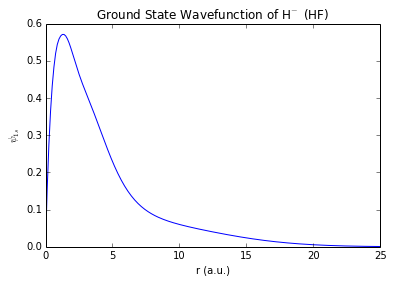

In [194]:
# Ploteo de Solución


plot(x,x*wave1s);
#axis([xmin,xmax,-0.6,0.25]);
title("Ground State Wavefunction of H$^{-}$ (HF)");
xlabel("r (a.u.)");
ylabel("$\psi_{1s}$");